#### Predictive Maintenance

In [2]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\MILAN\Desktop\project\Data_science_thesis\data_folder\ai4i2020.csv")

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [6]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
# Check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

#### Visualization

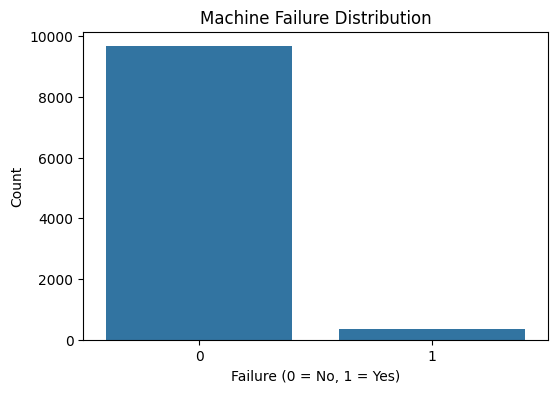

In [8]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Machine failure')
plt.title('Machine Failure Distribution')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

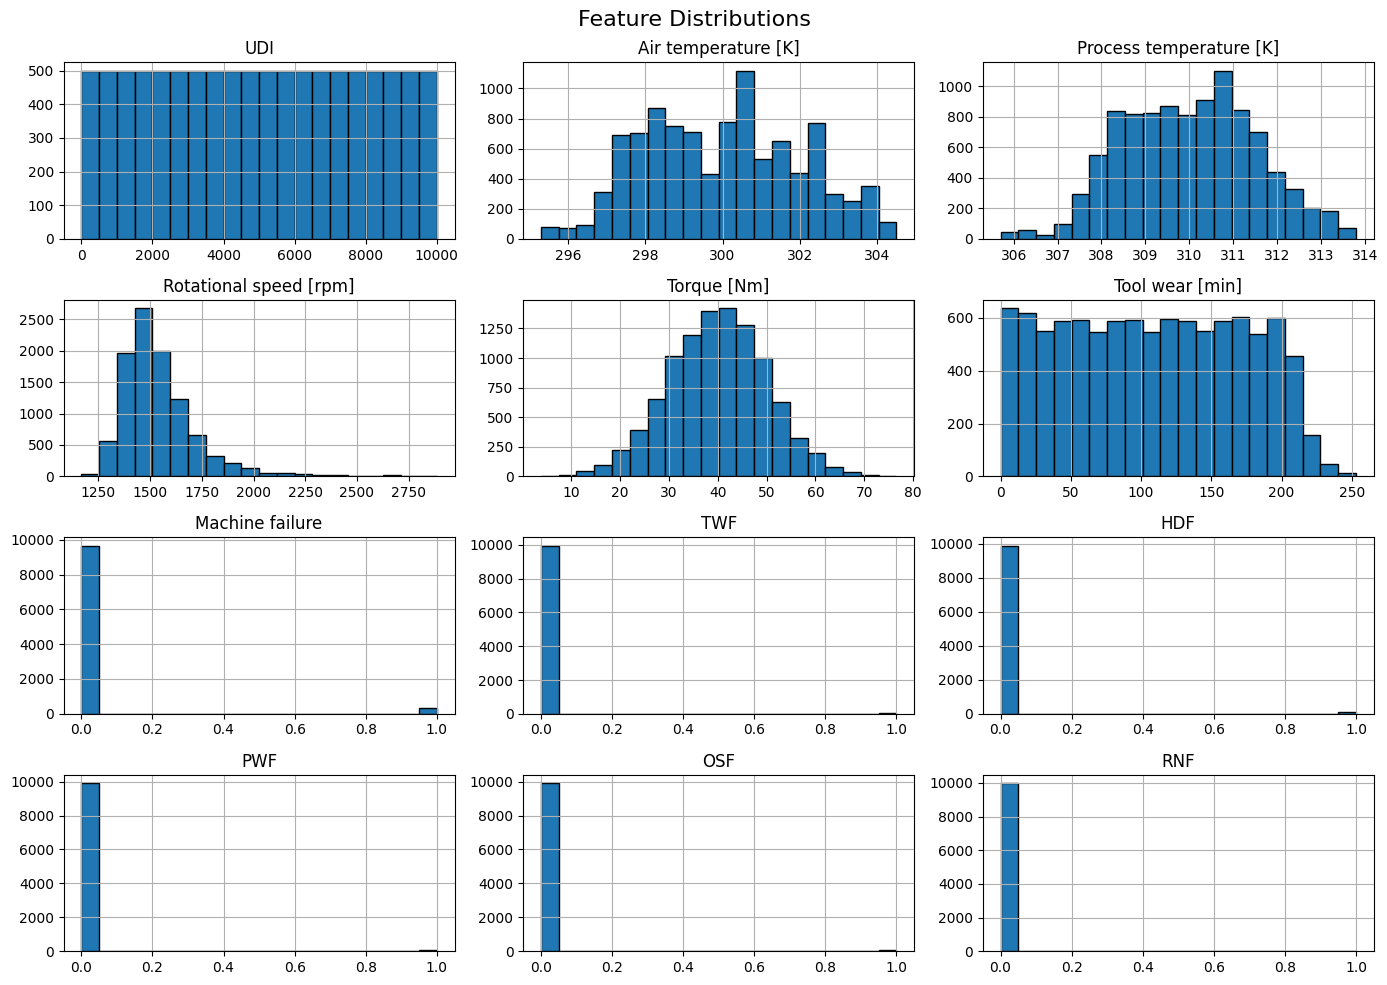

In [9]:
# Histogram for numerical features
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

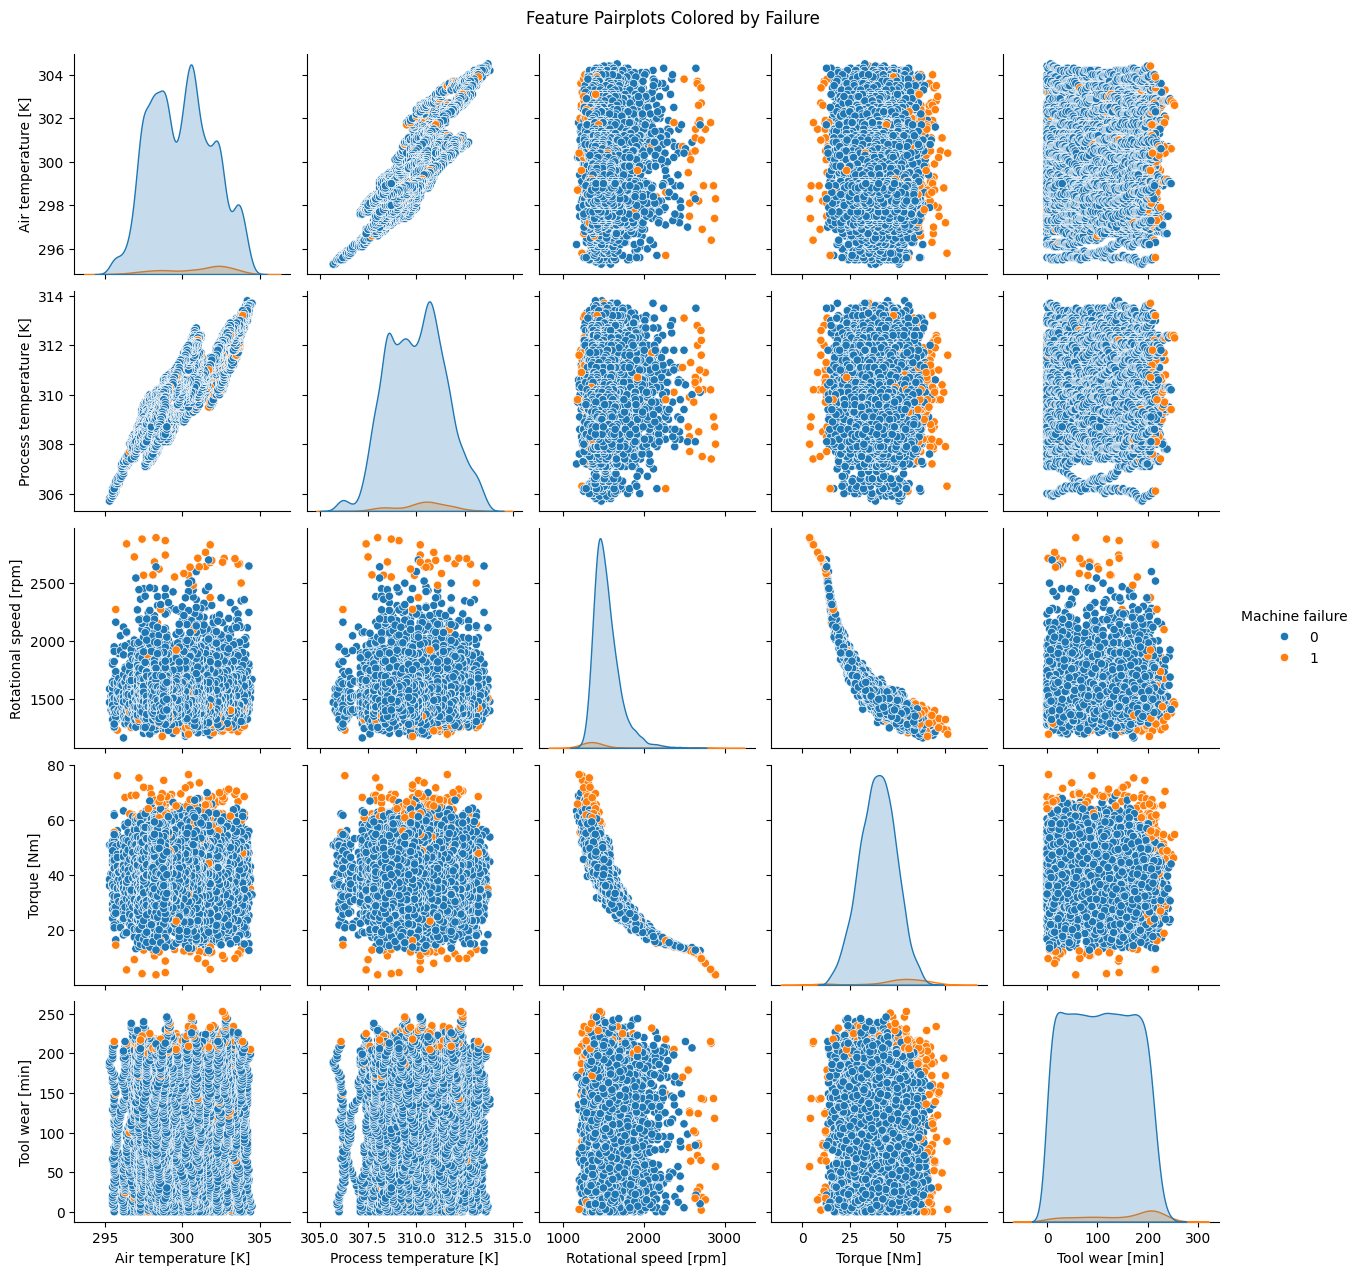

In [10]:
# pairplot for selected features
sample_cols = ['Air temperature [K]', 'Process temperature [K]', 
               'Rotational speed [rpm]', 'Torque [Nm]', 
               'Tool wear [min]', 'Machine failure']

sns.pairplot(df[sample_cols], hue='Machine failure', diag_kind='kde')
plt.suptitle("Feature Pairplots Colored by Failure", y=1.02)
plt.show()

#### Implement Machine Learning Basic Model

### Logistic Regression Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [24]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [35]:
# Clean up column names
df.columns = df.columns.str.strip()

# Drop columns safely
df.drop(columns=['UDI', 'Product ID'], errors='ignore', inplace=True)

In [36]:
# Drop irrelevant columns
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# Encode 'Type'
df['Type'] = LabelEncoder().fit_transform(df['Type'])

KeyError: "['UDI', 'Product ID'] not found in axis"

In [33]:
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

NameError: name 'X_scaled' is not defined

In [29]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'L'

## XAI 

In [ ]:
import shap

# Create SHAP explainer for Logistic Regression
explainer = shap.Explainer(log_reg, X_train_scaled, feature_names=X.columns)

# Calculate SHAP values
shap_values = explainer(X_test_scaled)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")


ModuleNotFoundError: No module named 'shap'

In [ ]:
# Explain a single instance
shap.plots.waterfall(shap_values[0], max_display=10)


In [ ]:
# Optional: force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature and target
X = df.drop(columns=['Machine failure', 'UDI', 'Product ID'], errors='ignore')
y = df['Machine failure']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop ID columns if present
df_clean = df.drop(columns=['UDI', 'Product ID'], errors='ignore')

# Encode 'Type' column (categorical)
if 'Type' in df_clean.columns:
    le = LabelEncoder()
    df_clean['Type'] = le.fit_transform(df_clean['Type'])

# Split into features and target
X = df_clean.drop('Machine failure', axis=1)
y = df_clean['Machine failure']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

In [ ]:
# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.999
Confusion Matrix:
 [[1939    0]
 [   2   59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


=== Random Forest ===
Accuracy: 0.999
Confusion Matrix:
 [[1939    0]
 [   2   59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


=== SVM ===
Accuracy: 0.999
Confusion Matrix:
 [[1939    0]
 [   2   59]]
Classification Report:
               precision

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("\n=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



=== XGBoost ===
Accuracy: 0.999
Confusion Matrix:
 [[1939    0]
 [   2   59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

